# Funções para geração de resultados

In [2]:
# Gera inputs
varia_filmes = [1000, 10000, 100000, 1000000, 10000000, 50000000]
varia_categorias = [1, 2, 3, 4, 5, 6]

!g++ -I/usr/local/Cellar/boost/1.75.0/include -L/usr/local/Cellar/boost/1.75.0/lib -lboost_random geradorInputs.cpp -o geradorInputs

for i in varia_filmes:
    for j in varia_categorias:
        !./geradorInputs {i} {j}
        !mv input.txt in-{i}-{j}.txt

In [18]:
# Gera outputs e mede tempo de execução
import time

files = !ls testes/

runtime_guloso = {}
runtime_aleatorio = {}

amount_of_films_guloso = {}
amout_of_films_aleatorio = {}

for file in files:
    start_time = time.time()
    !./guloso testes/{file} > outputs/out-guloso-{file}
    runtime_guloso[file] = time.time() - start_time
    with open(f"outputs/out-guloso-{file}") as f:
        first_line = f.readline().strip('\n')
        amount_of_films_guloso[file] = int(first_line.split(' ')[0])

    start_time = time.time()
    !./aleatorizado testes/{file} > outputs/out-aleatorio-{file}
    runtime_aleatorio[file] = time.time() - start_time
    with open(f"outputs/out-aleatorio-{file}") as f:
        first_line = f.readline().strip('\n')
        amout_of_films_aleatorio[file] = int(first_line.split(' ')[0])

In [77]:
# Gera arquivo csv com tempos de execução
import csv

with open('outputs/data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['num_filmes','num_categorias', 'runtime_guloso', 'runtime_aleatorizado', 'amount_of_films_guloso', 'amount_of_films_aleatorizado'])
    for input_value in runtime_guloso.keys():
        num_filmes = input_value.split('-')[1]
        num_categorias = input_value.split('-')[2].split('.')[0]
        writer.writerow([num_filmes, num_categorias, runtime_guloso[input_value], runtime_aleatorio[input_value], amount_of_films_guloso[input_value], amout_of_films_aleatorio[input_value]])


In [94]:
# Tabela de tempo de execução
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

df = pd.read_csv('outputs/data.csv')

df = df.set_index(['num_filmes', 'num_categorias'])

df_runtime = df[['runtime_guloso', 'runtime_aleatorizado']]

df_runtime

runtime_guloso  runtime_aleatorizado
num_filmes num_categorias                                      
10000      1                     0.221570              0.247312
           2                     0.251345              0.253783
           3                     0.233274              0.259556
           4                     0.255651              0.247932
           5                     0.257516              0.235381
           6                     0.305258              0.253492
1000       1                     0.234504              0.226261
           2                     0.248777              0.249304
           3                     0.235160              0.246072
           4                     0.250381              0.250936
           5                     0.244499              0.245896
           6                     0.245283              0.242606

In [95]:
# Tabela de quantidade de filmes
df_filmes = df[['amount_of_films_guloso', 'amount_of_films_aleatorizado']]
df_filmes

amount_of_films_guloso  \
num_filmes num_categorias                           
10000      1                                    1   
           2                                    2   
           3                                    9   
           4                                    9   
           5                                   20   
           6                                   23   
1000       1                                    1   
           2                                    3   
           3                                    5   
           4                                    7   
           5                                   14   
           6                                   13   

                           amount_of_films_aleatorizado  
num_filmes num_categorias                                
10000      1                                          1  
           2                                          2  
           3                                          9  
           4                                          9  
           5                                         15  
           6                                         13  
1000       1                                          1  
           2                                          3  
           3                                          5  
           4                                          7  
           5                                         11  
           6                                         10

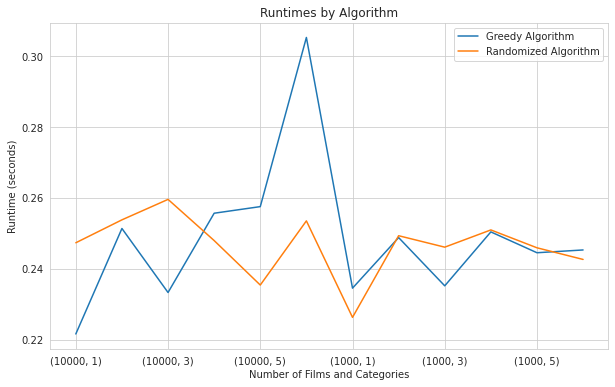

In [96]:
fig, ax = plt.subplots(figsize=(10, 6))
df_runtime['runtime_guloso'].plot(ax=ax, label='Greedy Algorithm')
df_runtime['runtime_aleatorizado'].plot(ax=ax, label='Randomized Algorithm')
ax.set_xlabel('Number of Films and Categories')
ax.set_ylabel('Runtime (seconds)')
ax.set_title('Runtimes by Algorithm')
ax.legend()
plt.show()

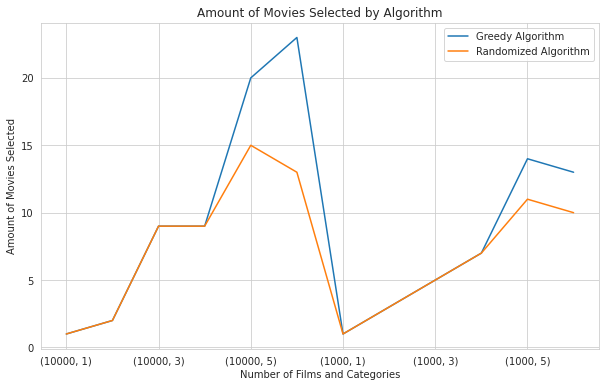

In [97]:
fig, ax = plt.subplots(figsize=(10, 6))
df_filmes['amount_of_films_guloso'].plot(ax=ax, label='Greedy Algorithm')
df_filmes['amount_of_films_aleatorizado'].plot(ax=ax, label='Randomized Algorithm')
ax.set_xlabel('Number of Films and Categories')
ax.set_ylabel('Amount of Movies Selected')
ax.set_title('Amount of Movies Selected by Algorithm')
ax.legend()
plt.show()

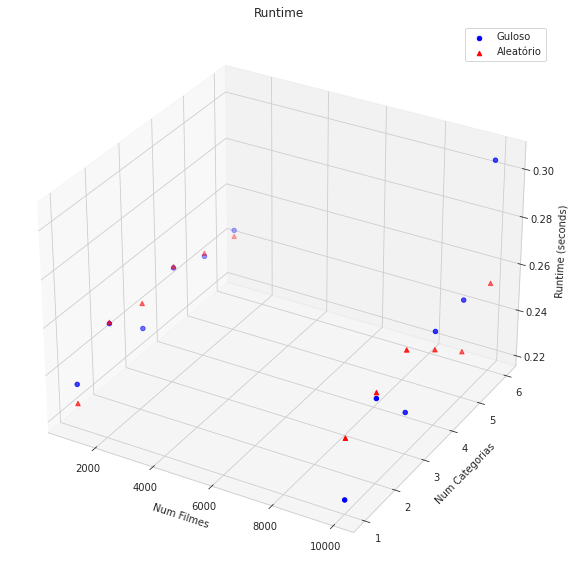

In [105]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
x = df_runtime.index.get_level_values(0)
y = df_runtime.index.get_level_values(1)
z_guloso = df_runtime['runtime_guloso']
z_aleatorio = df_runtime['runtime_aleatorizado']
ax.scatter(x, y, z_guloso, c='blue', marker='o', label='Guloso')
ax.scatter(x, y, z_aleatorio, c='red', marker='^', label='Aleatório')
ax.set_xlabel('Num Filmes')
ax.set_ylabel('Num Categorias')
ax.set_zlabel('Runtime (seconds)')
ax.legend()
plt.title('Runtime')
plt.show()

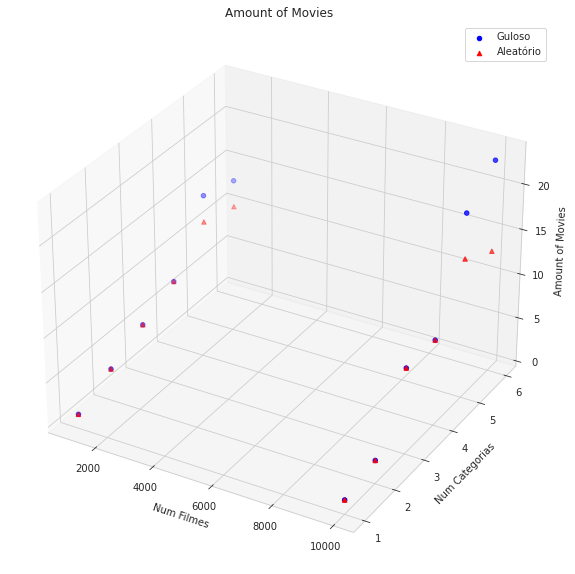

In [106]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
x = df_filmes.index.get_level_values(0)
y = df_filmes.index.get_level_values(1)
z_guloso = df_filmes['amount_of_films_guloso']
z_aleatorio = df_filmes['amount_of_films_aleatorizado']
ax.scatter(x, y, z_guloso, c='blue', marker='o', label='Guloso')
ax.scatter(x, y, z_aleatorio, c='red', marker='^', label='Aleatório')
ax.set_xlabel('Num Filmes')
ax.set_ylabel('Num Categorias')
ax.set_zlabel('Amount of Movies')
ax.legend()
plt.title('Amount of Movies')
plt.show()